Here we are going to find the best classifing model in supervised learning using Champions Game Method
We are going to model the data using
Decision Tree
Random Forest
Logistic Regression

Loading Data Set and cleaning it-
Dropping Unnecessary Columns
Replace Null Values
Removing Outliers
Balancing the data with Smote

In [5]:
# getting input dataframe, removing education column and renameing gender column
import pandas as pd
import scipy as sp
import numpy as np
import math

heart_df=pd.read_csv("framingham.csv")
heart_df.drop(['education'],axis=1,inplace=True)
heart_df.rename(columns={'male':'Sex_male'},inplace=True)
heart_df.head()

,Sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [6]:
# Calculate all missing values in Dataframe
heart_df.isnull().sum()


Sex_male             0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

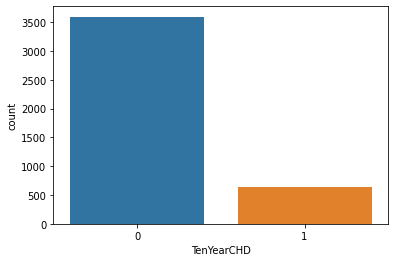

In [7]:
# target column plot
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='TenYearCHD',data=heart_df)


[Text(0, 0, 'Sex_male'),
 Text(1, 0, 'age'),
 Text(2, 0, 'currentSmoker'),
 Text(3, 0, 'cigsPerDay'),
 Text(4, 0, 'BPMeds'),
 Text(5, 0, 'prevalentStroke'),
 Text(6, 0, 'prevalentHyp'),
 Text(7, 0, 'diabetes'),
 Text(8, 0, 'totChol'),
 Text(9, 0, 'sysBP'),
 Text(10, 0, 'diaBP'),
 Text(11, 0, 'BMI'),
 Text(12, 0, 'heartRate'),
 Text(13, 0, 'glucose'),
 Text(14, 0, 'TenYearCHD')]

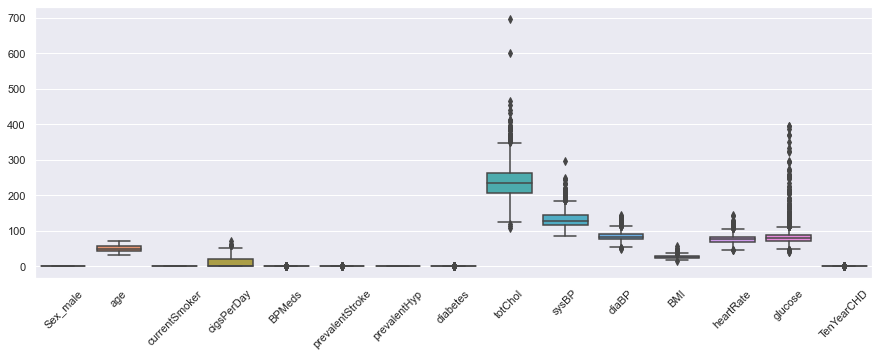

In [8]:
#Box Plot for seeing outliners
sns.set(rc={'figure.figsize':(15,5)})
ax=sns.boxplot(data=heart_df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

array([[<AxesSubplot:title={'center':'Sex_male'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'currentSmoker'}>,
        <AxesSubplot:title={'center':'cigsPerDay'}>],
       [<AxesSubplot:title={'center':'BPMeds'}>,
        <AxesSubplot:title={'center':'prevalentStroke'}>,
        <AxesSubplot:title={'center':'prevalentHyp'}>,
        <AxesSubplot:title={'center':'diabetes'}>],
       [<AxesSubplot:title={'center':'totChol'}>,
        <AxesSubplot:title={'center':'sysBP'}>,
        <AxesSubplot:title={'center':'diaBP'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'heartRate'}>,
        <AxesSubplot:title={'center':'glucose'}>,
        <AxesSubplot:title={'center':'TenYearCHD'}>, <AxesSubplot:>]],
      dtype=object)

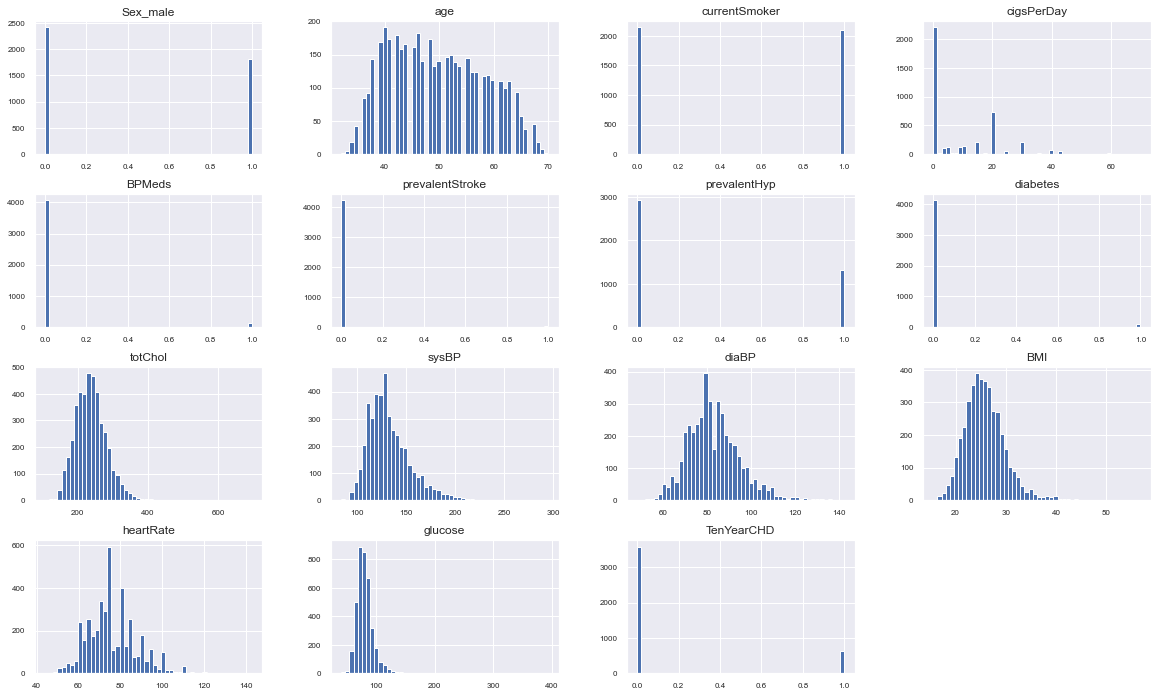

In [9]:
# get histogram of each column
heart_df.hist(figsize=(20, 12), bins=50, xlabelsize=8, ylabelsize=8)

In [10]:
# get bpmeds values
heart_df['BPMeds'].value_counts()

0.0    4061
1.0     124
Name: BPMeds, dtype: int64

In [11]:
# replace missing values in BPmeds with most frequent
# replace reamining missing values with mean
from sklearn.impute import SimpleImputer
si=SimpleImputer(strategy='most_frequent')
si.fit(heart_df[['BPMeds']])
heart_df[['BPMeds']]=pd.DataFrame(si.transform(heart_df[['BPMeds']]))
heart_df.isna().any()
si2=SimpleImputer(strategy='mean')
si2.fit(heart_df)
heart_df_clean=pd.DataFrame(si2.transform(heart_df))
heart_df_clean.isna().any()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
dtype: bool

In [12]:
#Changing Column Names Again
heart_df_clean.columns=heart_df.columns
heart_df_clean = heart_df_clean.astype(int)
heart_df_clean.head()

,Sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0,0,0,0,0,195,106,70,26,80,77,0
1,0,46,0,0,0,0,0,0,250,121,81,28,95,76,0
2,1,48,1,20,0,0,0,0,245,127,80,25,75,70,0
3,0,61,1,30,0,0,1,0,225,150,95,28,65,103,1
4,0,46,1,23,0,0,0,0,285,130,84,23,85,85,0


[Text(0, 0, 'Sex_male'),
 Text(1, 0, 'age'),
 Text(2, 0, 'currentSmoker'),
 Text(3, 0, 'cigsPerDay'),
 Text(4, 0, 'BPMeds'),
 Text(5, 0, 'prevalentStroke'),
 Text(6, 0, 'prevalentHyp'),
 Text(7, 0, 'diabetes'),
 Text(8, 0, 'totChol'),
 Text(9, 0, 'sysBP'),
 Text(10, 0, 'diaBP'),
 Text(11, 0, 'BMI'),
 Text(12, 0, 'heartRate'),
 Text(13, 0, 'glucose'),
 Text(14, 0, 'TenYearCHD')]

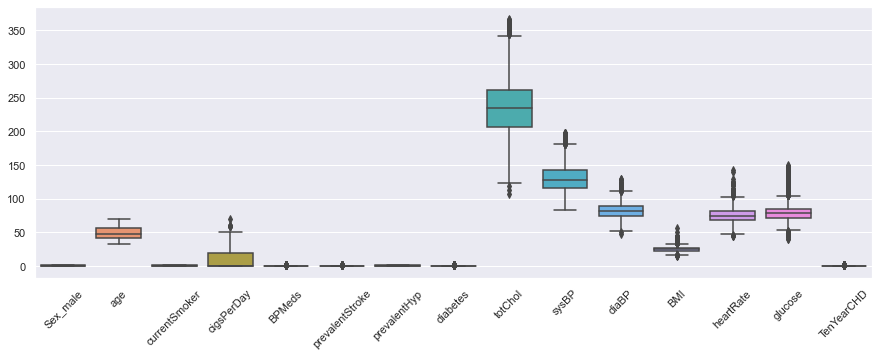

In [13]:
#Removing Outliners
from scipy import stats
heart_df_clean=heart_df_clean[np.abs(stats.zscore(heart_df_clean['totChol'])) < 3]
heart_df_clean=heart_df_clean[np.abs(stats.zscore(heart_df_clean['glucose'])) < 3]
heart_df_clean=heart_df_clean[np.abs(stats.zscore(heart_df_clean['sysBP'])) < 3]

sns.set(rc={'figure.figsize':(15,5)})
ax=sns.boxplot(data=heart_df_clean)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

In [14]:
target_data=heart_df_clean['TenYearCHD']
data_frame=heart_df_clean.drop('TenYearCHD',axis=1)

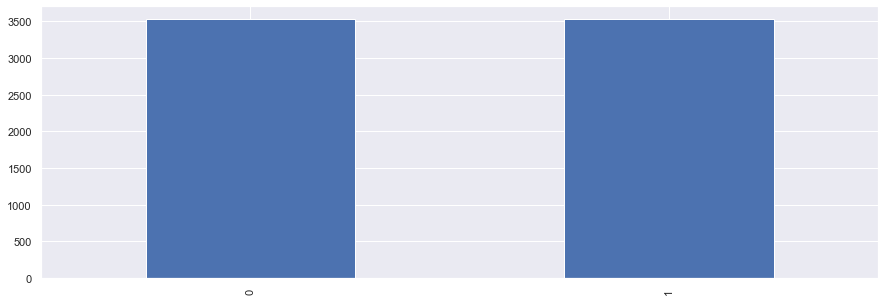

In [15]:
#Using SMOTE to balance the data
from imblearn.over_sampling import SMOTE
smote = SMOTE()
dt_f, target = smote.fit_resample(data_frame, target_data)
dt_f.columns=data_frame.columns
smote_plot=target.value_counts().plot(kind='bar')
plt.show()
#random sampling

We will use 2/3rd of the data from training and 1/3rd to test

In [16]:
# spliting data 1/3rd for testing
from sklearn.model_selection import train_test_split


dt_f_train, dt_f_test, target_train, target_test = train_test_split(dt_f, target, test_size = 0.33)

Decision Tree-

In [17]:
# training decision tree
from sklearn.tree import DecisionTreeClassifier
decisiontree_model = DecisionTreeClassifier(criterion="entropy",max_depth=10)   
decisiontree_model.fit(dt_f_train,target_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

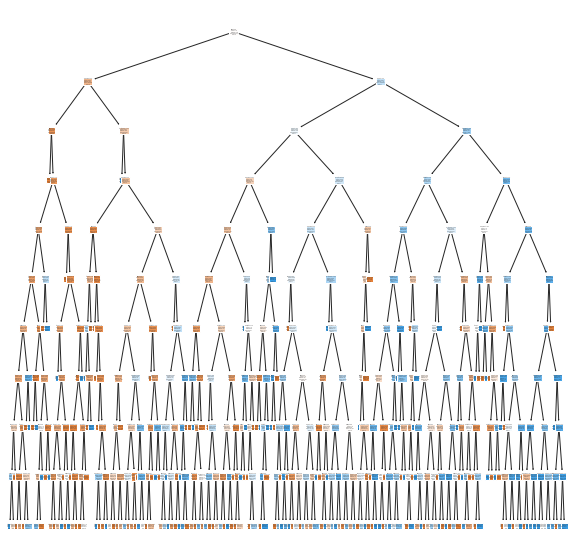

In [20]:
#Plot Decision Tree model
from sklearn import tree
from matplotlib import pyplot as plt

class_name = list(heart_df_clean['TenYearCHD'].unique())
feature_names = list(heart_df_clean.columns)
class_name = list(map(str, class_name)) 

fig = plt.figure(figsize=(10,10))
_ = tree.plot_tree(decisiontree_model, 
                      feature_names=feature_names,  
                      class_names=class_name,  
                      filled=True)   
fig.savefig("decistion_tree.png")

In [77]:
#Decision Tree Model Report
target_predict = decisiontree_model.predict(dt_f_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print('Decision Tree Classification Report')
decision_tree_classification_report=classification_report(target_test,target_predict)
print(decision_tree_classification_report)

print('Confusion Matrix')
decision_tree_con_mat=confusion_matrix(target_test,target_predict)
print(decision_tree_con_mat)

print('Decision Tree Accuracy Score')
decision_tree_accuracy_score=accuracy_score(target_test,target_predict)
print(decision_tree_accuracy_score)

Decision Tree Classification Report
              precision    recall  f1-score   support

           0       0.79      0.68      0.73      1149
           1       0.72      0.82      0.76      1146

    accuracy                           0.75      2295
   macro avg       0.75      0.75      0.75      2295
weighted avg       0.75      0.75      0.75      2295

Confusion Matrix
[[776 373]
 [208 938]]
Decision Tree Accuracy Score
0.7468409586056645


Random Forest-

In [78]:
#Using Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(bootstrap= True,
                           max_depth= 80,
                           max_features= 2,
                           min_samples_leaf= 3,
                           min_samples_split= 8,
                           n_estimators= 300,
                           random_state=0)
rfc.fit(dt_f_train,target_train)
y_pred_rfc=rfc.predict(dt_f_test)
print('Random Forest Classifier Accuracy Score: ',accuracy_score(target_test,y_pred_rfc))

print('Random Forest Classifier Report')
rfc_report=classification_report(target_test,y_pred_rfc)
print(rfc_report)

print('Random Forest Classifier Confusion Matrix')
rfc_con_mat=confusion_matrix(target_test,y_pred_rfc)
print(rfc_con_mat)

Random Forest Classifier Accuracy Score:  0.8213507625272332
Random Forest Classifier Report
              precision    recall  f1-score   support

           0       0.85      0.78      0.81      1149
           1       0.79      0.87      0.83      1146

    accuracy                           0.82      2295
   macro avg       0.82      0.82      0.82      2295
weighted avg       0.82      0.82      0.82      2295

Random Forest Classifier Confusion Matrix
[[893 256]
 [154 992]]


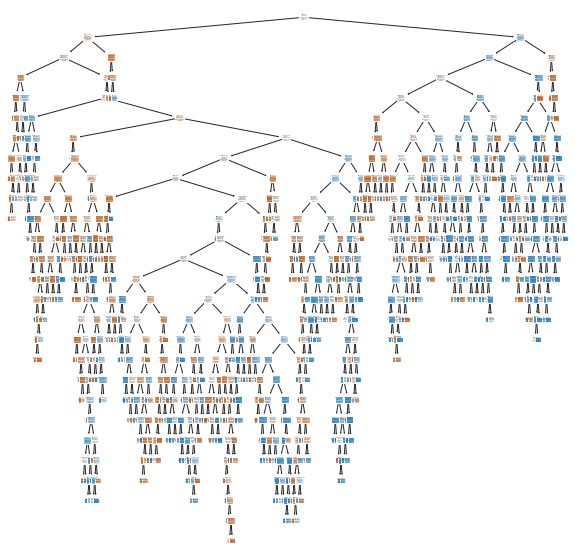

In [79]:
#random forest tree graph
from sklearn.tree import export_graphviz

estimator = rfc.estimators_[0]


fig = plt.figure(figsize=(10,10))
_ = tree.plot_tree(estimator, 
                      feature_names=feature_names,  
                      class_names=class_name,  
                      filled=True) 

fig.savefig("randomforest_tree.png")


Logistic Regression-

In [124]:
dt_f_train=training_set

In [125]:
training_set=dt_f_train
#Scaling the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
dt_f_train=pd.DataFrame(sc.fit_transform(dt_f_train))
dt_f_test=pd.DataFrame(sc.transform(dt_f_test))

#Scaling removed column indexes here i reset them
dt_f_train.columns= training_set.columns   
dt_f_test.columns= training_set.columns

target_train.index= dt_f_train.index
target_test.index= dt_f_test.index

dt_f_train.head()

,Sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,-0.798505,-0.723120,1.054953,-0.217427,-0.133849,-0.062277,-0.672874,-0.070436,-0.555124,-0.593890,0.128177,0.458997,1.175673,-0.381106
1,-0.798505,1.930882,1.054953,0.887531,-0.133849,-0.062277,1.486162,-0.070436,0.341970,1.061615,0.739414,1.248295,0.132032,0.540455
2,1.252341,-1.085029,1.054953,2.587467,-0.133849,-0.062277,-0.672874,-0.070436,0.172250,-1.421642,-1.181616,-0.856498,-0.911608,-0.934043
3,1.252341,-0.843756,1.054953,0.887531,-0.133849,-0.062277,-0.672874,-0.070436,-0.991548,-0.788655,-0.221101,-2.171993,-0.476758,-0.381106
4,1.252341,-0.843756,1.054953,2.587467,-0.133849,-0.062277,-0.672874,-0.070436,-0.918810,-0.691272,-0.308420,1.511394,-0.650698,-0.473262


In [126]:
#Training the first model Logistic regression without removing columns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
log_reg_classifier=LogisticRegression(C= 0.1, penalty= 'l2')
log_reg_classifier.fit(dt_f_train,target_train)
y_pred_lg=log_reg_classifier.predict(dt_f_test)

print('Coefficient of Determination', r2_score(target_test,y_pred_lg) ) 

print('Accuracy with Logistic Regression before removing insignificant columns: ',accuracy_score(target_test,y_pred_lg))

print('Logistic Regression Classifier Report')
lg_report=classification_report(target_test,y_pred_lg)
print(lg_report)

print('Logistic RegressionClassifier Confusion Matrix')
lg_con_mat=confusion_matrix(target_test,y_pred_lg)
print(lg_con_mat)

Coefficient of Determination -0.33686206723707635
Accuracy with Logistic Regression before removing insignificant columns:  0.6657952069716776
Logistic Regression Classifier Report
              precision    recall  f1-score   support

           0       0.67      0.66      0.66      1154
           1       0.66      0.67      0.67      1141

    accuracy                           0.67      2295
   macro avg       0.67      0.67      0.67      2295
weighted avg       0.67      0.67      0.67      2295

Logistic RegressionClassifier Confusion Matrix
[[761 393]
 [374 767]]


In [127]:
#Using backward elimination to drop insignificant columns(P-Value>0.05)
import statsmodels.api as sm
regressor_ols=sm.OLS(endog=target_train,exog=dt_f_train).fit()

X_opt_train=pd.DataFrame(dt_f_train[:],dtype=float)
while True:
    for h in range(X_opt_train.shape[1]):
        regressor_ols=sm.OLS(endog=target_train,exog=X_opt_train).fit()
        if regressor_ols.pvalues[h] == regressor_ols.pvalues.max() and regressor_ols.pvalues[h] > 0.05:
            X_opt_train.drop(X_opt_train.columns[h],axis=1,inplace=True)
            break
    if regressor_ols.pvalues.max() <= 0.05:
        break

significant_cols=X_opt_train.columns
significant_cols

Index(['Sex_male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentHyp', 'sysBP'],
      dtype='object')

In [128]:
dt_f_train_sig=dt_f_train[significant_cols]
dt_f_test_sig=dt_f_test[significant_cols]

dt_f_train_sig.head()

,Sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentHyp,sysBP
0,-0.798505,-0.723120,1.054953,-0.217427,-0.133849,-0.672874,-0.593890
1,-0.798505,1.930882,1.054953,0.887531,-0.133849,1.486162,1.061615
2,1.252341,-1.085029,1.054953,2.587467,-0.133849,-0.672874,-1.421642
3,1.252341,-0.843756,1.054953,0.887531,-0.133849,-0.672874,-0.788655
4,1.252341,-0.843756,1.054953,2.587467,-0.133849,-0.672874,-0.691272


In [132]:
# logistic regression after removing columns
log_reg_classifier_sig=LogisticRegression(C= 0.1, penalty= 'l2')
log_reg_classifier_sig.fit(dt_f_train_sig,target_train)
y_pred_lg_sig=log_reg_classifier_sig.predict(dt_f_test_sig)

print('Coefficient of Determination', r2_score(y_pred_lg_sig,target_test) ) 

print('Accuracy with Logistic Regression after removing insignificant columns: ',accuracy_score(target_test,y_pred_lg_sig))

print('Logistic Regression Classifier Report')
lg_sig_report=classification_report(target_test,y_pred_lg_sig)
print(lg_sig_report)

print('Logistic RegressionClassifier Confusion Matrix')
lg_sig_con_mat=confusion_matrix(target_test,y_pred_lg_sig)
print(lg_sig_con_mat)

Coefficient of Determination -0.36486784140969175
Accuracy with Logistic Regression after removing insignificant columns:  0.6588235294117647
Logistic Regression Classifier Report
              precision    recall  f1-score   support

           0       0.66      0.65      0.66      1154
           1       0.65      0.67      0.66      1141

    accuracy                           0.66      2295
   macro avg       0.66      0.66      0.66      2295
weighted avg       0.66      0.66      0.66      2295

Logistic RegressionClassifier Confusion Matrix
[[753 401]
 [382 759]]


So we can easily see, Random Forest is the best model for the data with best accuracy, recall, precision and the least Type 2 errors